<h1 style="text-align:center">Deep Learning   </h1>
<h1 style="text-align:center"> Lab Session 2 - 3 Hours </h1>
<h1 style="text-align:center"> Convolutional Neural Network (CNN) for Handwritten Digits Recognition</h1>

<div class="alert alert-info">
<b> Student 1:</b> Daniele Reda  
<br>
<b> Student 2:</b> Matteo Romiti
</div> 
 
The aim of this session is to practice with Convolutional Neural Networks. Answers and experiments should be made by groups of one or two students. Each group should fill and run appropriate notebook cells. 


Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an pdf document using print as PDF (Ctrl+P). Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by May 29th 2017.

Send you pdf file to benoit.huet@eurecom.fr and olfa.ben-ahmed@eurecom.fr using **[DeepLearning_lab2]** as Subject of your email.

# Introduction

In the last Lab Session, you built a Multilayer Perceptron for recognizing hand-written digits from the MNIST data-set. The best achieved accuracy on testing data was about 97%.  Can  you do better than these results using a deep CNN ?
In this Lab Session, you will build, train and optimize in TensorFlow one of the early Convolutional Neural Networks:  **LeNet-5** to go to  more than 99% of accuracy. 






# Load MNIST Data in TensorFlow
Run the cell above to load the MNIST data that comes  with TensorFlow. You will use this data in **Section 1** and **Section 2**.

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels
print("Image Shape:    {}".format(X_train[0].shape))
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Image Shape:    (784,)
Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


# Section 1 : My First Model in TensorFlow

Before starting with CNN, let's train and test in TensorFlow the example :
**y=softmax(Wx+b)** seen in the DeepLearing course last week. 

This model reaches an accuracy of about 92 %.
You will also learn how to launch the tensorBoard https://www.tensorflow.org/get_started/summaries_and_tensorboard to  visualize the computation graph, statistics and learning curves. 

<b> Part 1 </b> : Read carefully the code in the cell below. Run it to perform training. 

In [3]:
# from __future__ import print_function
# import tensorflow as tf


#STEP 1

# Parameters
learning_rate = 0.01
training_epochs = 100
batch_size = 128
display_step = 2
logs_path = 'log_files/'  # useful for tensorboard

# tf Graph Input:  mnist data image of shape 28*28=784
x = tf.placeholder(tf.float32, [None, 784], name='InputData')
# 0-9 digits recognition,  10 classes
y = tf.placeholder(tf.float32, [None, 10], name='LabelData')

# Set model weights
W = tf.Variable(tf.zeros([784, 10]), name='Weights')
b = tf.Variable(tf.zeros([10]), name='Bias')

# Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
with tf.name_scope('Model'):
    # Model
    pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax
with tf.name_scope('Loss'):
    # Minimize error using cross entropy
    cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
with tf.name_scope('SGD'):
    # Gradient Descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
with tf.name_scope('Accuracy'):
    # Accuracy
    acc = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()
# Create a summary to monitor cost tensor
tf.summary.scalar("Loss", cost)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("Accuracy", acc)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()


#STEP 2 


# Launch the graph for training
with tf.Session() as sess:
    sess.run(init)
    # op to write logs to Tensorboard
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop), cost op (to get loss value)
            # and summary nodes
            _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
            # Write logs at every iteration
            summary_writer.add_summary(summary, epoch * total_batch + i)
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    # Calculate accuracy
    print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))




Epoch:  02   =====> Loss= 0.732524195
Epoch:  04   =====> Loss= 0.536677648
Epoch:  06   =====> Loss= 0.470880614
Epoch:  08   =====> Loss= 0.435697370
Epoch:  10   =====> Loss= 0.414145648
Epoch:  12   =====> Loss= 0.396247747
Epoch:  14   =====> Loss= 0.384974787
Epoch:  16   =====> Loss= 0.375682483
Epoch:  18   =====> Loss= 0.367070107
Epoch:  20   =====> Loss= 0.360158942
Epoch:  22   =====> Loss= 0.352310474
Epoch:  24   =====> Loss= 0.348237286
Epoch:  26   =====> Loss= 0.345345280
Epoch:  28   =====> Loss= 0.342196290
Epoch:  30   =====> Loss= 0.336128746
Epoch:  32   =====> Loss= 0.332090786
Epoch:  34   =====> Loss= 0.329738538
Epoch:  36   =====> Loss= 0.326926193
Epoch:  38   =====> Loss= 0.323137202
Epoch:  40   =====> Loss= 0.324002850
Epoch:  42   =====> Loss= 0.319857761
Epoch:  44   =====> Loss= 0.317417873
Epoch:  46   =====> Loss= 0.317157803
Epoch:  48   =====> Loss= 0.313185978
Epoch:  50   =====> Loss= 0.314381154
Epoch:  52   =====> Loss= 0.312158206
Epoch:  54  

<b> Part 2  </b>: Using Tensorboard, we can  now visualize the created graph, giving you an overview of your architecture and how all of the major components  are connected. You can also see and analyse the learning curves. 

To launch tensorBoard: 
- Go to the **TP2** folder, 
- Open a Terminal and run the command line **"tensorboard --logdir= log_files/"**, it will generate an http link ,ex http://666.6.6.6:6006,
- Copy this  link into your web browser 


Enjoy It !! 


# Section 2 : The 99% MNIST Challenge !

<b> Part 1 </b> : LeNet5 implementation

Once you are familar with **tensorFlow** and **tensorBoard**, you are in this section to build, train and test the baseline [LeNet-5](http://yann.lecun.com/exdb/lenet/)  model for the MNIST digits recognition problem.  

In more advanced step you will make some optimizations to get more than 99% of accuracy. The best model can get to over 99.7% accuracy! 

For more information, have a look at this list of results : http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html


<img src="lenet.png",width="800" height="600" align="center">
<center><span>Figure 1: Lenet 5 </span></center>





The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

--------------------------
**Layer 1: Convolutional.** The output shape should be 28x28x6 **Activation.** sigmoid **Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16. **Activation.** sigmoid **Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.  You may need to use **flatten*  from tensorflow.contrib.layers import flatten

**Layer 3: Fully Connected.** This should have 120 outputs. **Activation.** sigmoid

**Layer 4: Fully Connected.** This should have 84 outputs. **Activation.** sigmoid

**Layer 5: Fully Connected.** This should have 10 outputs **Activation.** softmax.


<b> Question 2.1.1 </b>  Implement the Neural Network architecture described above.
For that, your will use classes and functions from  https://www.tensorflow.org/api_docs/python/tf/nn. 

We give you some helper functions for weigths and bias initilization. Also you can refer to section 1. 


In [4]:
#Helper functions  for weigths and bias initilization 
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W, stride, padding_):
    return tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding=padding_)

In [5]:
def LeNet5_Model(data):    
    # your implementation goes here
    
    #first convolutional layer
    W_conv1 = weight_variable([5, 5, 1, 6]) ## [filter_width, filter_height, depth_image_in, depth_image_out]
    b_conv1 = bias_variable([6])
    h_conv1 = tf.sigmoid(conv2d(data, W_conv1, 1, 'SAME') + b_conv1)
    pool1 = tf.nn.pool(h_conv1, [2,2], "MAX", 'VALID', strides=[2,2])
    
    #second convolutional layer
    W_conv2 = weight_variable([5, 5, 6, 16])
    b_conv2 = bias_variable([16])
    h_conv2 = tf.sigmoid(conv2d(pool1, W_conv2, 1, 'VALID') + b_conv2)
    pool2 = tf.nn.pool(h_conv2, [2,2], "MAX", 'VALID', strides=[2,2])
    
    #first fully connected layer
    s = pool2.get_shape().as_list()
    flattened_length = s[1] * s[2] * s[3]
    pool2_flat = tf.reshape(pool2, [-1, flattened_length])
    W_fc1 = weight_variable([1*5*5*16, 120])
    b_fc1 = bias_variable([120])
    h_fc1 = tf.sigmoid(tf.matmul(pool2_flat, W_fc1) + b_fc1)

    #second fully connected layer
    W_fc2 = weight_variable([120, 84])
    b_fc2 = bias_variable([84])
    h_fc2 = tf.sigmoid(tf.matmul(h_fc1, W_fc2) + b_fc2)
    
    #third fully connected layer
    W_fc3 = weight_variable([84, 10])
    b_fc3 = bias_variable([10])
    h_fc3 = tf.nn.softmax(tf.matmul(h_fc2, W_fc3) + b_fc3)
    
    return h_fc3

<b> Question 2.1.2. </b>  Calculate the number of parameters of this model 

In [6]:
# first conv
pconv1 = 5*5*1*6 # filter_height * filter_width * channels_in * num_feature_maps
# second conv
pconv2 = 5*5*1*16 # filter_height * filter_width * channels_in * num_feature_maps
# first fcl
pfcl1 = 5*5*16*120 # fcl_input_size * fcl_output_size
pfcl1# second fcl
pfcl2 = 84*120 # fcl_input_size * fcl_output_size
# third fcl
pfcl3 = 84*10 # fcl_input_size * fcl_output_size
pbias = 6+16+120+84+10 # all the biases
total = pbias + pfcl1 + pfcl2 + pfcl3 + pconv2 + pconv1
print(total)

59706


<b> Question 2.1.3. </b>  Start the training with the parameters cited below:

     Learning rate : 0.1
     Loss Function : Cross entropy
     Optimizer: SGD
     Number of training iterations : 10000
     Batch size : 128

In [14]:
learning_rate = 0.1
training_epochs = 200
batch_size = 128
display_step = 1
logs_path = 'log_files/'

<b> Question 2.1.4. </b>  Implement the evaluation function for accuracy computation 

In [15]:
def evaluate(model, y):
    accuracy = acc.eval({x: mnist.test.images, y: mnist.test.labels})
    return accuracy

<b> Question 2.1.5. </b>  Implement training pipeline and run the training data through it to train the model.

- Before each epoch, shuffle the training set. 
- Print the loss per mini batch and the training/validation accuracy per epoch. (Display results every 100 epochs)
- Save the model after training
- Print after training the final testing accuracy 



In [16]:
def train(learning_rate, training_epochs, batch_size, display_step = 1, \
          logs_path='log_files/', optFunction="SGC", verbose=True):
    
    optFunctions = {"SGC":tf.train.GradientDescentOptimizer, "ReLU":tf.train.AdamOptimizer}
    
    # Erase previous graph
    tf.reset_default_graph()

    x = tf.placeholder(tf.float32, [None, 28, 28, 1], name='InputData')
    y = tf.placeholder(tf.float32, [None, 10], name='LabelData')

    # Construct model
    with tf.name_scope('Model'):
        pred = LeNet5_Model(x)

    # Define loss and optimizer
    with tf.name_scope('Loss'):
        cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
        #cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

    with tf.name_scope(optFunction):
        optimizer = optFunctions[optFunction](learning_rate).minimize(cost)

    # Evaluate model
    with tf.name_scope('Accuracy'):
        correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Initializing the variables
    init = tf.global_variables_initializer()

    # Create a summary to monitor cost tensor
    tf.summary.scalar("Loss", cost)
    # Create a summary to monitor accuracy tensor
    tf.summary.scalar("Accuracy", accuracy)
    # Merge all summaries into a single op
    merged_summary_op = tf.summary.merge_all()

    x_val, y_val = mnist.validation.images.reshape(-1, 28, 28, 1), mnist.validation.labels
    x_test, y_test = mnist.test.images.reshape(-1, 28, 28, 1), mnist.test.labels

    with tf.Session() as sess:
        sess.run(init)
        if verbose is True:
            print("Start Training!")
        # op to write logs to Tensorboard
        summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
        saver = tf.train.Saver()
        #Training cycle
        for epoch in range(training_epochs):
            avg_cost = 0.
            total_batch = int(mnist.train.num_examples/batch_size)
            #Loop over all batches
            for i in range(total_batch):
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
                batch_xs = batch_xs.reshape(-1, 28, 28, 1)
                # Run optimization op (backprop), cost op (to get loss value)
                # and summary nodes
                _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                         feed_dict={x: batch_xs, y: batch_ys})
                 # Write logs at every iteration
                summary_writer.add_summary(summary, epoch * total_batch + i)
                # Compute average loss
                avg_cost += c / total_batch
            # Display logs per epoch step
            acc = accuracy.eval({x: x_val, y: y_val})
            saver.save(sess, 'Models/model_' + str(learning_rate) + '_' + str(batch_size) + '_' + optFunction)
            if verbose is True and (epoch+1) % display_step == 0:
                print("Epoch: ", '%02d' % (epoch+1), \
                      "  =====> Loss=", "{:.9f}".format(avg_cost), " Training accuracy=", acc)
            if acc>=0.99:
                if verbose is True:
                    print("Accuracy over 99%% reached after %d epochs" %(epoch+1))
                break
                
        if verbose is True:
            print("Training Finished!")
            # Test model
            # Calculate accuracy
            print("Test accuracy:", accuracy.eval({x: x_test, y: y_test}))
        
        val_acc = accuracy.eval({x: x_val, y: y_val})
        test_acc = accuracy.eval({x: x_test, y: y_test})
    return val_acc, test_acc

In [17]:
train(learning_rate, training_epochs, batch_size)

Start Training!
Epoch:  01   =====> Loss= 2.306923388  Training accuracy= 0.1126
Epoch:  02   =====> Loss= 2.305711344  Training accuracy= 0.0986
Epoch:  03   =====> Loss= 2.305181658  Training accuracy= 0.0986
Epoch:  04   =====> Loss= 2.304064671  Training accuracy= 0.0986
Epoch:  05   =====> Loss= 2.302289627  Training accuracy= 0.112
Epoch:  06   =====> Loss= 2.298982566  Training accuracy= 0.11
Epoch:  07   =====> Loss= 2.288852153  Training accuracy= 0.1904
Epoch:  08   =====> Loss= 2.172151118  Training accuracy= 0.3124
Epoch:  09   =====> Loss= 1.590616186  Training accuracy= 0.6548
Epoch:  10   =====> Loss= 0.923477484  Training accuracy= 0.7828
Epoch:  11   =====> Loss= 0.641152425  Training accuracy= 0.8538
Epoch:  12   =====> Loss= 0.476603856  Training accuracy= 0.8866
Epoch:  13   =====> Loss= 0.369493994  Training accuracy= 0.913
Epoch:  14   =====> Loss= 0.301952966  Training accuracy= 0.9292
Epoch:  15   =====> Loss= 0.256582659  Training accuracy= 0.9388
Epoch:  16   

(0.99019998, 0.98820001)

<b> Question 2.1.6 </b> : Use tensorBoard to visualise and save the LeNet5 Graph and all learning curves. 
Save all obtained figures in the folder **"TP2/MNIST_99_Challenge_Figures"**

In [18]:
#insert your obtained figure here

In [19]:
# your answer goes here

<b> Part 2 </b> : LeNET 5 Optimization


<b> Question 2.2.1 </b>  Change the sigmoid function with a ReLU :

- Retrain your network with SGD and AdamOptimizer and then fill the table above  :


| Optimizer            |  Gradient Descent         |AdamOptimizer |
| -------------        |: -------------: | ---------:   
| Validation Accuracy  |         |    |      
| Testing Accuracy     |           |    |       
| Training Time        |           |        |  |  


- Try with different learning rates for each Optimizer (0.0001 and 0.001 ) and different Batch sizes (50 and 128) for 20000 Epochs. 

- For each optimizer, plot (on the same curve) the **testing accuracies** function to **(learning rate, batch size)** 



- Did you reach the 99% accuracy ? What are the optimal parametres that gave you the best results? 








In [21]:
import time

learning_rates = [0.001, 0.0001]
batch_sizes = [50, 128]
optNames = ["SGC", "ReLU"]
training_epochs = 150

results = []

for lr in learning_rates:
    for bs in batch_sizes:
        for on in optNames:
            print("Learning rate:", lr, "Batch size:", bs, "optimizer:", on)
            t1 = time.time()
            val_acc, test_acc = train(learning_rate=lr, training_epochs=training_epochs, batch_size=bs, \
                                      display_step=50, optFunction=on, verbose=False)
            t2 = time.time() - t1
            print("\t====> Time:", t2, "Validation accuracy:", val_acc, "Test accuracy:", test_acc)
            results.append((lr, bs, on, t2, val_acc, test_acc))

Learning rate: 0.001 Batch size: 50 optimizer: SGC
	====> Time: 4450.806636333466 Validation accuracy: 0.1126 Test accuracy: 0.1135
Learning rate: 0.001 Batch size: 50 optimizer: ReLU
	====> Time: 360.2967257499695 Validation accuracy: 0.99 Test accuracy: 0.9858
Learning rate: 0.001 Batch size: 128 optimizer: SGC
	====> Time: 3697.093007326126 Validation accuracy: 0.1126 Test accuracy: 0.1135
Learning rate: 0.001 Batch size: 128 optimizer: ReLU
	====> Time: 696.3485853672028 Validation accuracy: 0.9906 Test accuracy: 0.9876
Learning rate: 0.0001 Batch size: 50 optimizer: SGC
	====> Time: 4444.108605384827 Validation accuracy: 0.1126 Test accuracy: 0.1135
Learning rate: 0.0001 Batch size: 50 optimizer: ReLU
	====> Time: 4500.74076128006 Validation accuracy: 0.989 Test accuracy: 0.9877
Learning rate: 0.0001 Batch size: 128 optimizer: SGC
	====> Time: 3724.1400146484375 Validation accuracy: 0.1126 Test accuracy: 0.1135
Learning rate: 0.0001 Batch size: 128 optimizer: ReLU
	====> Time: 373

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
results = [
    (0.001, 50, "SGC", 4450.806636333466, 0.1126, 0.1135),
    (0.001, 50, "ReLU", 360.2967257499695, 0.99, 0.9858),
    (0.001, 128, "SGC", 3697.093007326126, 0.1126, 0.1135),
    (0.001, 128, "ReLU", 696.3485853672028, 0.9906, 0.9876),
    (0.0001, 50, "SGC", 4444.108605384827, 0.1126, 0.1135),
    (0.0001, 50, "ReLU", 4500.74076128006, 0.989, 0.9877),
    (0.0001, 128, "SGC", 3724.1400146484375, 0.1126, 0.1135),
    (0.0001, 128, "ReLU", 3732.6566574573517, 0.9876, 0.9881)
]

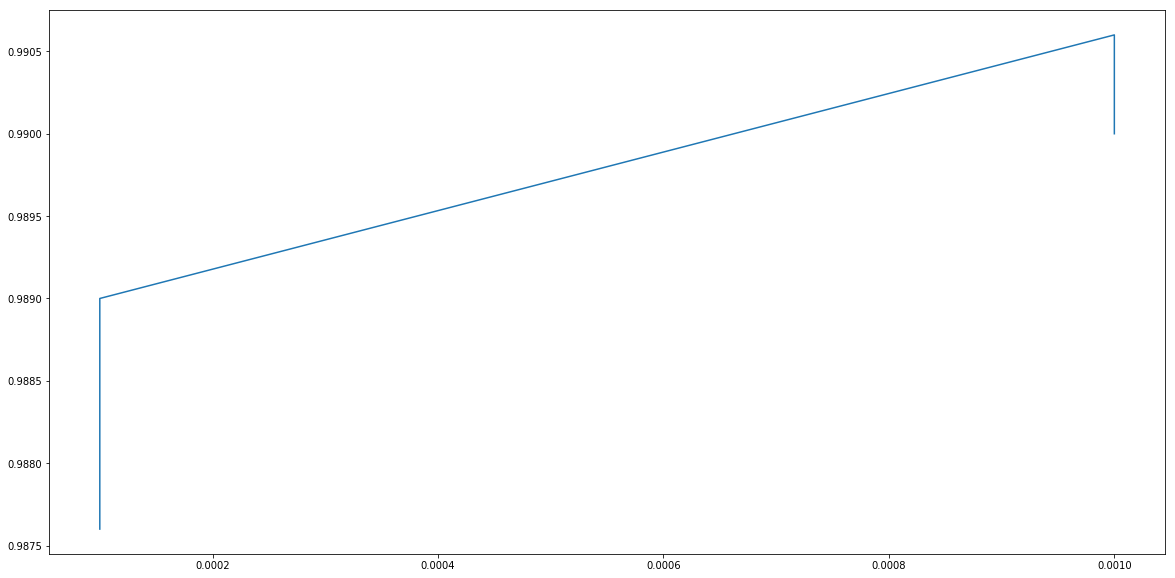

In [5]:
plt.figure(figsize=(20,10))
plt.plot([x[0] for x in results if x[2] is "ReLU"], [x[4] for x in results  if x[2] is "ReLU"])
plt.show()

<b> Question 2.2.2 </b>  What about applying a dropout layer on the Fully connected layer and then retraining the model with the best Optimizer and parameters(Learning rate and Batch size) obtained in *Question 2.2.1*  ? (probability to keep units=0.75). For this stage ensure that the keep prob is set to 1.0 to evaluate the 
performance of the network including all nodes.

In [ ]:
results

In [ ]:
# your implementaion goas here

In [ ]:
Your comments go here